# **Semantic Segmentation Using HAGDAVS Dataset**

### **Import Libraries**

In [1]:
%%capture
!pip uninstall tensorflow -y
!pip uninstall tensorflow-io -y
!pip install tensorflow
!pip install --no-deps tensorflow-io

In [4]:
import tensorflow as tf
import tensorflow_io as tfio
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import pathlib
from PIL import Image
import shutil
from tensorflow.keras.layers.experimental import preprocessing

from tensorflow.data import AUTOTUNE

## **Augmentation**

In [5]:
def rotate_image(image,degrees):
    tfImage = keras.preprocessing.image
    image_array = tfImage.img_to_array(image)
    rotated_image_array = tfImage.random_rotation(
    x = image_array,
    rg = degrees,
    row_axis = 0,
    col_axis = 1,
    channel_axis = 2
    )
    
    rotated_image = tfImage.array_to_img(rotated_image_array)
    return rotated_image

def mirror_image(image, axis):
    tfImage = keras.preprocessing.image
    image_tensor = tf.convert_to_tensor(image)
    
    if axis == True:
        mirrored_image = tf.image.flip_left_right(image_tensor)
    elif axis == False:
        mirrored_image = tf.image.flip_up_down(image_tensor)
    
    mirrored_image_array = tfImage.img_to_array(mirrored_image)
    mirrored_image_array = tfImage.array_to_img(mirrored_image_array)
    return mirrored_image_array

def contrast_image(image, contrast):
    tfImage = keras.preprocessing.image
    contrast_imag = tf.image.adjust_contrast(image, contrast)
    contrast_imag = tfImage.img_to_array(contrast_imag)
    contrast_imag = tfImage.array_to_img(contrast_imag)
    return contrast_imag

## **Load Data**

This code performs the following actions:

1. Defines directory paths for the input data, including the folder containing RGB images and the folder containing masks.
2. Sets the destination folder path to save the modified images.
3. Creates the new destination folder if it doesn't exist.
4. Retrieves the list of file names in the masks folder.
5. Iterates over each file in the list and does the following:
   - Checks if the file name contains the text "MClass".
   - If it does, modifies the file name by replacing "MClass" with "RGB".
   - Creates an old file path and a new file path.
   - Copies the old file to the new path.

In summary, the code takes masks in the "MClass" format and copies them to a new folder, but changes their names to the "RGB" format.

In [6]:
data_dir = pathlib.Path('/kaggle/input/hagdavs/HAGDAVS')
images_dir = data_dir / 'RGB'
masks_dir = data_dir / 'MASK'
new_folder_mod_MASK = '/kaggle/working/modified/HAGDAVS/MASK'
new_folder_mod_IMG = '/kaggle/working/modified/HAGDAVS/IMG'

file_lists_img = os.listdir(images_dir)
file_list_mask = os.listdir(masks_dir)

# Crear la nueva carpeta si no existe
os.makedirs(new_folder_mod_MASK, exist_ok=True)
os.makedirs(new_folder_mod_IMG, exist_ok=True)

def datasetMod(degrees, angle):
    for image_path, mask_path in zip(file_lists_img, file_list_mask):
        image = keras.preprocessing.image.load_img(os.path.join(images_dir,image_path))
        mask = keras.preprocessing.image.load_img(os.path.join(masks_dir, mask_path))
        
        rot_img = rotate_image(image, degrees)
        mirror_img = mirror_image(rot_img, True)
        
        rot_mask = rotate_image(mask, degrees)
        mirror_mask = mirror_image(rot_mask, True)
        
        contrast_img = contrast_image(mirror_img, 2.0)
        contrast_mask = contrast_image(mirror_mask, 2.0)
        
        # Split the file name and extension
        file_name_img, file_extension_img = os.path.splitext(image_path)
        file_name_mask, file_extension_mask = os.path.splitext(mask_path)

        # Add angle before the extension
        new_image_path = file_name_img + angle + file_extension_img
        new_mask_path = file_name_mask + angle + file_extension_mask
        
        path_img_mirror = os.path.join(new_folder_mod_IMG, f'mod_{new_image_path}')
        path_MASK_mirror = os.path.join(new_folder_mod_MASK, f'mod_{new_mask_path}')
        
        contrast_img.save(path_img_mirror)
        contrast_mask.save(path_MASK_mirror)

datasetMod(30, '30')
datasetMod(90, '90')
datasetMod(150, '150')
datasetMod(180, '180')
datasetMod(270, '270')

In [7]:
data_dir = pathlib.Path('/kaggle/input/hagdavs/HAGDAVS')
images_dir = data_dir / 'RGB'
masks_dir = data_dir / 'MASK'

folder_path = masks_dir  # Ruta de la carpeta que contiene las imágenes
new_folder_path = '/kaggle/working/semantic-segmentation-hagdavs/HAGDAVS/MASK'

# Crear la nueva carpeta si no existe
os.makedirs(new_folder_path, exist_ok=True)

# Obtener la lista de nombres de archivo en la carpeta
file_list = os.listdir(folder_path)

# Aplicar la modificación del nombre y crear nuevos archivos en la nueva carpeta
for filename in file_list:
    if "MClass" in filename:
        new_filename = filename.replace("MClass", "RGB")
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(new_folder_path, new_filename)
        shutil.copy2(old_path, new_path)

In [8]:
data_dir = pathlib.Path('/kaggle/working/modified/HAGDAVS')
images_dir = data_dir / 'RGB'
masks_dir = data_dir / 'MASK'

folder_path = masks_dir  # Ruta de la carpeta que contiene las imágenes
new_folder_path = '/kaggle/working/semantic-segmentation-hagdavs/HAGDAVS/MASK'

# Crear la nueva carpeta si no existe
os.makedirs(new_folder_path, exist_ok=True)

# Obtener la lista de nombres de archivo en la carpeta
file_list = os.listdir(folder_path)

# Aplicar la modificación del nombre y crear nuevos archivos en la nueva carpeta
for filename in file_list:
    if "MClass" in filename:
        new_filename = filename.replace("MClass", "RGB")
        old_path = os.path.join(folder_path, filename)
        new_path = os.path.join(new_folder_path, new_filename)
        shutil.copy2(old_path, new_path)

This code performs the following actions:

1. Defines directory paths for the image and mask folders.
2. Retrieves a list of file paths for the images and masks.
3. Creates empty lists to store image and mask patches.
4. Sets the desired patch size.
5. Defines a function to load and split the images and masks into patches.
   - It reads the image and mask files.
   - Removes the alpha channel from the images and masks.
   - Divides the image into patches based on the specified patch size.
   - Checks if all pixels in a mask patch are black, and if so, skips it.
   - Appends the image and mask patches to their respective lists.
6. Applies the load_and_split_patches function to each image and mask pair.
7. Converts the lists of patches into TensorFlow tensors.
8. Creates a dataset from the image and mask patches.

In summary, the code loads image and mask files, divides them into patches of a specified size, filters out patches with all-black masks, and creates a dataset for further processing or training.

In [10]:
import tensorflow as tf
import tensorflow_io as tfio
import pathlib

# Ruta a las carpetas de imágenes y máscaras
ima_dir = pathlib.Path('/kaggle/input/hagdavs/HAGDAVS')
ima_mod_fir = pathlib.Path('/kaggle/working/modify/HAGDAVS') /'IMG'
images_dir = ima_dir / 'RGB'
m_dir = pathlib.Path('/kaggle/working/semantic-segmentation-hagdavs/HAGDAVS')
mask_dir = m_dir / 'MASK'

# Obtener una lista de rutas de archivo para imágenes y máscaras
image_paths = sorted([str(path) for path in images_dir.glob('*.tif')] + [str(path) for path in ima_mod_fir.glob('*.tif')])
mask_paths = sorted([str(path) for path in mask_dir.glob('*.tif')])

# Crear una lista para almacenar los parches de imágenes y máscaras
image_patches = []
mask_patches = []

# Tamaño del parche deseado
#TENER EN CUENTA 
patch_size = (256, 256)

# Definir una función para cargar y dividir las imágenes y máscaras en parches
def load_and_split_patches(image_path, mask_path):
    image = tfio.experimental.image.decode_tiff(tf.io.read_file(image_path))
    mask = tfio.experimental.image.decode_tiff(tf.io.read_file(mask_path))

    # Eliminar el canal alfa de las imágenes y máscaras
    image = image[:, :, :3]
    mask = mask[:, :, :3]

    # Dividir la imagen en parches
    for i in range(0, image.shape[0], patch_size[0]):
        for j in range(0, image.shape[1], patch_size[1]):
            patch_image = image[i:i+patch_size[0], j:j+patch_size[1], :]
            patch_mask = mask[i:i+patch_size[0], j:j+patch_size[1], :]

            # Verificar si todos los píxeles en el parche de la máscara son negros
            if tf.reduce_all(tf.math.equal(patch_mask, [0, 0, 0])):
                continue
                
            #patch_mask = convertir_colores(patch_mask)
            image_patches.append(patch_image)
            mask_patches.append(patch_mask)

    return None

# Aplicar la función de carga y división de parches a cada par de rutas de archivo
for image_path, mask_path in zip(image_paths, mask_paths):
    load_and_split_patches(image_path, mask_path)

# Convertir las listas de parches en tensores
image_patches = tf.convert_to_tensor(image_patches)
mask_patches = tf.convert_to_tensor(mask_patches)

# Crear un dataset a partir de los parches de imágenes y máscaras
dataset = tf.data.Dataset.from_tensor_slices((image_patches, mask_patches))

In [35]:
# import tensorflow as tf
# import tensorflow_io as tfio
# import pathlib

# # Ruta a las carpetas de imágenes y máscaras
# ima_dir = pathlib.Path('/kaggle/input/hagdavs/HAGDAVS')
# images_dir = ima_dir / 'RGB'
# m_dir = pathlib.Path('/kaggle/working/semantic-segmentation-hagdavs/HAGDAVS')
# mask_dir = m_dir / 'MASK'

# # Obtener una lista de rutas de archivo para imágenes y máscaras
# image_paths = sorted([str(path) for path in images_dir.glob('*.tif')])
# mask_paths = sorted([str(path) for path in mask_dir.glob('*.tif')])

# # Crear una lista para almacenar los parches de imágenes y máscaras
# image_patches = []
# mask_patches = []

# # Tamaño del parche deseado
# patch_size = (256, 256)


# # Definir una función para cargar y dividir las imágenes y máscaras en parches
# def load_and_split_patches(image_path, mask_path):
#     image = tfio.experimental.image.decode_tiff(tf.io.read_file(image_path))
#     mask = tfio.experimental.image.decode_tiff(tf.io.read_file(mask_path))

#     # Eliminar el canal alfa de las imágenes y máscaras
#     image = image[:, :, :3]
#     mask = mask[:, :, :3]

#     # Dividir la imagen en parches
#     for i in range(0, image.shape[0], patch_size[0]):
#         for j in range(0, image.shape[1], patch_size[1]):
#             patch_image = image[i:i+patch_size[0], j:j+patch_size[1], :]
#             patch_mask = mask[i:i+patch_size[0], j:j+patch_size[1], :]

#             # Verificar si todos los píxeles en el parche de la máscara son negros
#             if tf.reduce_all(tf.math.equal(patch_mask, [0, 0, 0])):
#                 continue
                
#             #patch_mask = convertir_colores(patch_mask)
#             image_patches.append(patch_image)
#             mask_patches.append(patch_mask)

#     return None

# # Aplicar la función de carga y división de parches a cada par de rutas de archivo
# for image_path, mask_path in zip(image_paths, mask_paths):
#     load_and_split_patches(image_path, mask_path)

# # Convertir las listas de parches en tensores
# image_patches = tf.convert_to_tensor(image_patches)
# mask_patches = tf.convert_to_tensor(mask_patches)

# # Crear un dataset a partir de los parches de imágenes y máscaras
# dataset = tf.data.Dataset.from_tensor_slices((image_patches, mask_patches))

The size of images in dataset:

In [11]:
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None))>

## **Display Data**

Function for show the image, mask and prediction mask

In [12]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ["Input Image", "True Mask", "Predicted Mask"]

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
    plt.axis("off")
  plt.show()

## **Using only one class**

This code defines a function called `convertir_mascara` and applies it to a dataset using the `map` function.

The `convertir_mascara` function performs the following actions:

1. Casts the input mask tensor to `float32` data type.
2. Creates a new mask tensor filled with zeros, with dimensions `(256, 256, 1)`.
3. Assigns values corresponding to each class in the mask:
   - If all RGB values in the mask are `[0, 0, 0]`, assigns `0.0` to the corresponding pixel in the converted mask.
   - If all RGB values are `[255, 0, 0]`, assigns `0.0`.
   - If all RGB values are `[0, 255, 0]`, assigns `1.0`.
   - If all RGB values are `[0, 0, 255]`, assigns `0.0`.
4. Returns the converted mask.

The code then applies the `convertir_mascara` function to each element in the `dataset` using the `map` function. The `map` function takes a lambda function that applies the conversion function to each `(image, mask)` pair in the dataset, resulting in a new dataset named `mapped_dataset`. The images in the dataset remain unchanged, while the masks are converted using the `convertir_mascara` function.

In [13]:
def convertir_mascara(mascara):
    mascara = tf.cast(mascara, dtype=tf.float32)
    mascara_convertida = tf.zeros((256, 256, 1), dtype=tf.float32)

    # Asigna valores correspondientes a cada clase
    mascara_convertida = tf.where(tf.reduce_all(tf.equal(mascara, [0, 0, 0]), axis=-1, keepdims=True), 0.0, mascara_convertida)
    mascara_convertida = tf.where(tf.reduce_all(tf.equal(mascara, [255, 0, 0]), axis=-1, keepdims=True), 0.0, mascara_convertida)
    mascara_convertida = tf.where(tf.reduce_all(tf.equal(mascara, [0, 255, 0]), axis=-1, keepdims=True), 1.0, mascara_convertida)
    mascara_convertida = tf.where(tf.reduce_all(tf.equal(mascara, [0, 0, 255]), axis=-1, keepdims=True), 0.0, mascara_convertida)

    return mascara_convertida

mapped_dataset = dataset.map(lambda x, y: (x, convertir_mascara(y)))

This code defines a function called `filter_func` that filters the `mapped_dataset` based on certain criteria using the `filter` function.

The `filter_func` function performs the following actions:

1. Reshapes the mask tensor into a 1-dimensional tensor.
2. Uses `tf.unique` to obtain the unique classes present in the mask.
3. Checks if the number of unique classes (`tf.size(unique_classes)`) is greater than or equal to 2.
   - If there are two or more unique classes, it returns `True`, indicating that the image and mask pair should be included in the filtered dataset.
   - If there are fewer than two unique classes, it returns `False`, indicating that the image and mask pair should be filtered out.

The code then applies the `filter_func` function to each element in the `mapped_dataset` using the `filter` function. The `filter` function takes the lambda function `filter_func` as an argument and returns a new dataset named `filtered_dataset` that contains only the image and mask pairs that satisfy the filtering criteria.

In [14]:
import tensorflow as tf

def filter_func(image, mask):
    unique_classes = tf.unique(tf.reshape(mask, [-1]))[0]
    return tf.size(unique_classes) >= 2

filtered_dataset = mapped_dataset.filter(filter_func)

dataset_length = 0
for _ in filtered_dataset:
    dataset_length += 1

print("Longitud aproximada del dataset filtrado:", dataset_length)

Longitud aproximada del dataset filtrado: 1043


## **Splitting data**

train/test/val split

In [15]:
# dividir el dataset en conjuntos de entrenamiento, validación y prueba
total_samples = (dataset_length)
train_size = int(0.7 * total_samples)
val_size = int(0.15 * total_samples)
test_size = total_samples - train_size - val_size

train_dataset = filtered_dataset.take(train_size)
val_dataset = filtered_dataset.skip(train_size).take(val_size)
test_dataset = filtered_dataset.skip(train_size + val_size).take(test_size)

In [16]:
BATCH_SIZE = 16
BUFFER_SIZE = 100

In [17]:
train_batches = train_dataset.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_batches = train_batches.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
validation_batches = test_dataset.batch(BATCH_SIZE)
test_batches = test_dataset.batch(BATCH_SIZE)

## **Loss**

In [18]:
from tensorflow import keras
import keras.backend as K
from keras.losses import binary_crossentropy

# #Tensorflow / Keras
# def DiceBCELoss(y_true, y_pred, smooth=1e-6):    
    
#     # if you are using this loss for multi-class segmentation then uncomment 
#     # following lines
#     # if y_pred.shape[-1] <= 1:
#     #     # activate logits
#     #     y_pred = tf.keras.activations.sigmoid(y_pred)
#     # elif y_pred.shape[-1] >= 2:
#     #     # activate logits
#     #     y_pred = tf.keras.activations.softmax(y_pred, axis=-1)
#     #     # convert the tensor to one-hot for multi-class segmentation
#     #     y_true = K.squeeze(y_true, 3)
#     #     y_true = tf.cast(y_true, "int32")
#     #     y_true = tf.one_hot(y_true, num_class, axis=-1)
    
#     # cast to float32 datatype
#     y_true = K.cast(y_true, 'float32')
#     y_pred = K.cast(y_pred, 'float32')
    
#     #flatten label and prediction tensors
#     inputs = K.flatten(y_pred)
#     targets = K.flatten(y_true)
    
#     BCE =  binary_crossentropy(targets, inputs)
#     intersection = K.sum(K.dot(targets, inputs))    
#     dice_loss = 1 - (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
#     Dice_BCE = BCE + dice_loss
    
#     return Dice_BCE


# def DiceLoss(y_true, y_pred, smooth=1e-6):
    
#     # if you are using this loss for multi-class segmentation then uncomment 
#     # following lines
#     # if y_pred.shape[-1] <= 1:
#     #     # activate logits
#     #     y_pred = tf.keras.activations.sigmoid(y_pred)
#     # elif y_pred.shape[-1] >= 2:
#     #     # activate logits
#     #     y_pred = tf.keras.activations.softmax(y_pred, axis=-1)
#     #     # convert the tensor to one-hot for multi-class segmentation
#     #     y_true = K.squeeze(y_true, 3)
#     #     y_true = tf.cast(y_true, "int32")
#     #     y_true = tf.one_hot(y_true, num_class, axis=-1)
    
#     # cast to float32 datatype
#     y_true = K.cast(y_true, 'float32')
#     y_pred = K.cast(y_pred, 'float32')
    
#     #flatten label and prediction tensors
#     inputs = K.flatten(y_pred)
#     targets = K.flatten(y_true)
    
#     intersection = K.sum(K.dot(targets, inputs))
#     dice = (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
#     return 1 - dice

#Tensorflow / Keras
def TverskyLoss(y_true, y_pred, smooth=1e-6):
    
        if y_pred.shape[-1] <= 1:
            alpha = 0.3
            beta = 0.7
            gamma = 4/3 #5.
            y_pred = tf.keras.activations.sigmoid(y_pred)
            #y_true = y_true[:,:,:,0:1]
        elif y_pred.shape[-1] >= 2:
            alpha = 0.3
            beta = 0.7
            gamma = 4/3 #3.
            y_pred = tf.keras.activations.softmax(y_pred, axis=-1)
            y_true = K.squeeze(y_true, 3)
            y_true = tf.cast(y_true, "int32")
            y_true = tf.one_hot(y_true, num_class, axis=-1)
           
        y_true = K.cast(y_true, 'float32')
        y_pred = K.cast(y_pred, 'float32')
        #flatten label and prediction tensors
        inputs = K.flatten(y_pred)
        targets = K.flatten(y_true)
        
        #True Positives, False Positives & False Negatives
        TP = K.sum((inputs * targets))
        FP = K.sum(((1-targets) * inputs))
        FN = K.sum((targets * (1-inputs)))
       
        Tversky = (TP + smooth) / (TP + alpha*FP + beta*FN + smooth)  
        
        return 1 - Tversky
    
def dsc(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dsc(y_true, y_pred)
    return loss

def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  return iou

def iou_loss(y_true, y_pred, smooth=1):
    return 1-iou_coef(y_true, y_pred, smooth=1)

## **Unet**

In [17]:
# def double_conv_block(x, n_filters):

#     # Conv2D then ReLU activation
#     x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)
#     # Conv2D then ReLU activation
#     x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)
#     # Conv2D then ReLU activation
#     x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal")(x)
#     x = layers.BatchNormalization()(x)
#     x = layers.Activation("relu")(x)
#     # dropout
#     x = layers.Dropout(0.2)(x)

#     return x

# def downsample_block(x, n_filters):
#     f = double_conv_block(x, n_filters)
#     p = layers.MaxPool2D(2)(f)
#     p = layers.Dropout(0.2)(p)

#     return f, p

# def upsample_block(x, conv_features, n_filters):
#     # upsample
#     x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
#     # concatenate 
#     x = layers.concatenate([x, conv_features])
#     # dropout
#     x = layers.Dropout(0.2)(x)
#     # Conv2D twice with ReLU activation
#     x = double_conv_block(x, n_filters)

#     return x
    
# def build_unet_model():

#     # inputs
#     inputs = layers.Input(shape=(256,256,3))

#     # encoder: contracting path - downsample
#     # 1 - downsample
#     f1, p1 = downsample_block(inputs, 64)
#     # 2 - downsample
#     f2, p2 = downsample_block(p1, 128)
#     # 3 - downsample
#     f3, p3 = downsample_block(p2, 256)
#     # 4 - downsample
#     f4, p4 = downsample_block(p3, 512)

#     # 5 - bottleneck
#     bottleneck = double_conv_block(p4, 1024)
#     bottleneck = layers.Dropout(0.3)(bottleneck)

#     # decoder: expanding path - upsample
#     # 6 - upsample
#     u6 = upsample_block(bottleneck, f4, 512)
#     # 7 - upsample
#     u7 = upsample_block(u6, f3, 256)
#     # 8 - upsample
#     u8 = upsample_block(u7, f2, 128)
#     # 9 - upsample
#     u9 = upsample_block(u8, f1, 64)

#     # outputs
#     outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)

#     # unet model with Keras Functional API
#     unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

#     return unet_model

# unet_model = build_unet_model()

# #loss = keras.losses.sparse_categorical_crossentropy()

# unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
#                    loss=TverskyLoss,
#                    metrics=[dsc, iou_coef])

In [19]:
from keras.regularizers import l1, l2, L1L2

drop = 0.05
l = 3e-10

def double_conv_block(x, n_filters):
    
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal", activity_regularizer=l1(l=l))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal", activity_regularizer=l1(l=l))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", kernel_initializer = "he_normal", activity_regularizer=l1(l=l))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    # dropout
    x = layers.Dropout(drop)(x)

    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = layers.MaxPool2D(2)(f)
    p = layers.Dropout(drop)(p)

    return f, p

def upsample_block(x, conv_features, n_filters):
    # upsample
    x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same", activity_regularizer=l1(l=l))(x)
    # concatenate 
    x = layers.concatenate([x, conv_features])
    # dropout
    x = layers.Dropout(drop)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)

    return x
    
def build_unet_model():

    # inputs
    inputs = layers.Input(shape=(256,256,3))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 32)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 64)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 128)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 256)

    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 512)
    bottleneck = layers.Dropout(drop)(bottleneck)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 256)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 128)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 64)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 32)

    # outputs
    outputs = layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

unet_model = build_unet_model()

#loss = keras.losses.sparse_categorical_crossentropy()

unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss=TverskyLoss,
                   metrics=[dsc, iou_coef])

## **Training**

In [30]:
keras.backend.clear_session()
NUM_EPOCHS = 45
BATCH_SIZE = 16


STEPS_PER_EPOCH = total_samples // BATCH_SIZE

VAL_SUBSPLITS = 5
VALIDATION_STEPS = test_size // BATCH_SIZE // VAL_SUBSPLITS

model_history = unet_model.fit(train_batches,
                               epochs=NUM_EPOCHS,
                               steps_per_epoch=STEPS_PER_EPOCH,
                               validation_steps=VALIDATION_STEPS,
                               validation_data=validation_batches,)

Epoch 1/45


2023-06-29 06:31:55.781480: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inU-Net/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


65/65 [==============================] - 65s 979ms/step - loss: 0.8742 - dsc: 0.5341 - iou_coef: 0.3765 - val_loss: 0.8414 - val_dsc: 0.3170 - val_iou_coef: 0.2585
Epoch 2/45
65/65 [==============================] - 60s 927ms/step - loss: 0.8580 - dsc: 0.5770 - iou_coef: 0.4083 - val_loss: 0.9295 - val_dsc: 0.3078 - val_iou_coef: 0.2728
Epoch 3/45
65/65 [==============================] - 62s 958ms/step - loss: 0.8647 - dsc: 0.5364 - iou_coef: 0.3811 - val_loss: 0.8411 - val_dsc: 0.3360 - val_iou_coef: 0.3298
Epoch 4/45
65/65 [==============================] - 60s 923ms/step - loss: 0.8708 - dsc: 0.5602 - iou_coef: 0.4044 - val_loss: 0.8379 - val_dsc: 0.4694 - val_iou_coef: 0.3083
Epoch 5/45
65/65 [==============================] - 62s 962ms/step - loss: 0.8530 - dsc: 0.5757 - iou_coef: 0.4185 - val_loss: 0.8370 - val_dsc: 0.3237 - val_iou_coef: 0.2922
Epoch 6/45
65/65 [==============================] - 63s 966ms/step - loss: 0.8722 - dsc: 0.5751 - iou_coef: 0.4085 - val_loss: 0.8397 - 

## **Visualization of predictions**

In [31]:
def create_mask(pred_mask, threshold=0.2):
  pred_mask = tf.cast(pred_mask, dtype=tf.float32)  # convertir a float
  pred_mask = tf.where(pred_mask > threshold, 1.0, 0.0)  # usar float para el threshold
  return pred_mask[0]

def show_predictions(dataset, model, num):
  if dataset:
    for image, mask in dataset.take(num):
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [32]:
# Re-evaluate the model
loss, iou, dice = unet_model.evaluate(test_batches, verbose=2)
print(f"Modelo tiene dice coef: {round(100 * dice)}%, loss: {round(100 * loss)}%,")
print(f"Modelo tiene iou coef: {round(100 * iou)}%, loss: {round(100 * loss)}%,")

10/10 - 9s - loss: 0.8461 - dsc: 0.6527 - iou_coef: 0.4746 - 9s/epoch - 899ms/step
Modelo tiene dice coef: 47%, loss: 85%,
Modelo tiene iou coef: 65%, loss: 85%,


1/1 [==============================] - 0s 262ms/step


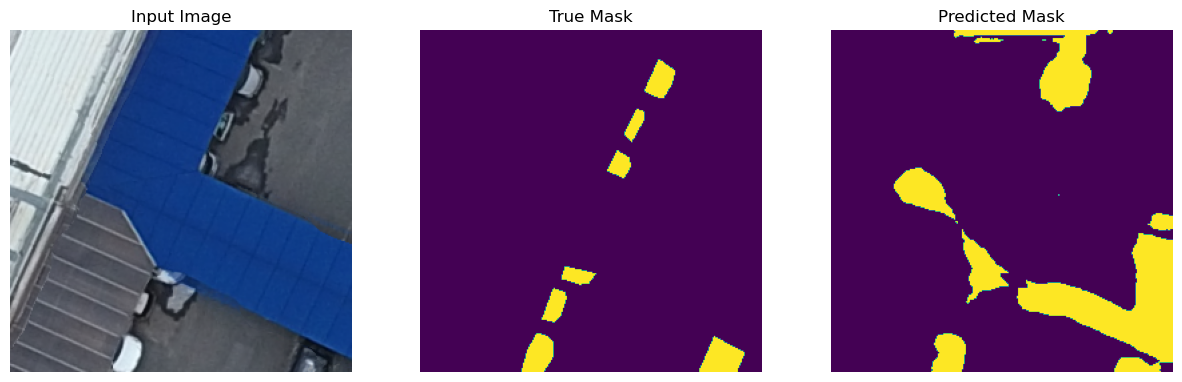

1/1 [==============================] - 0s 33ms/step


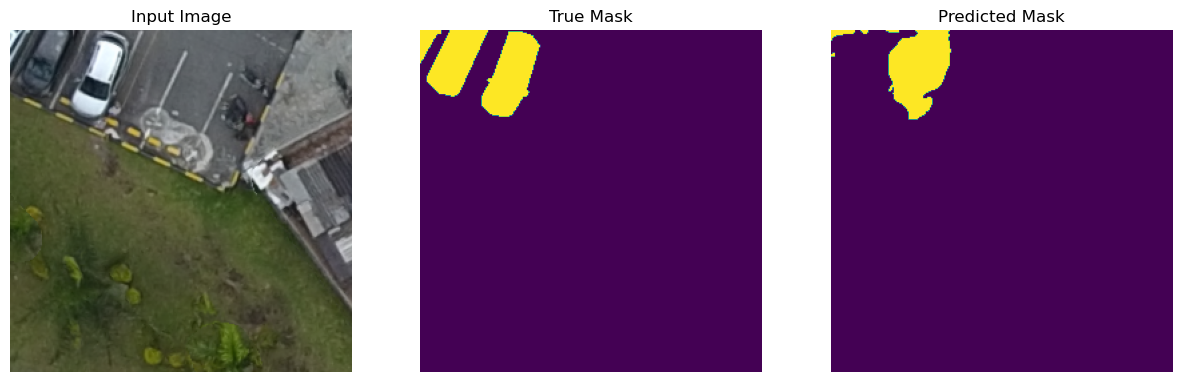

1/1 [==============================] - 0s 32ms/step


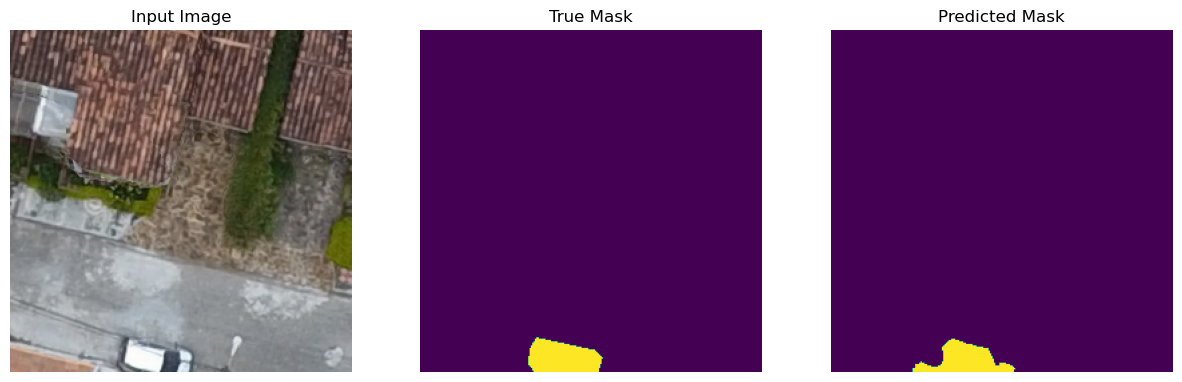

1/1 [==============================] - 0s 31ms/step


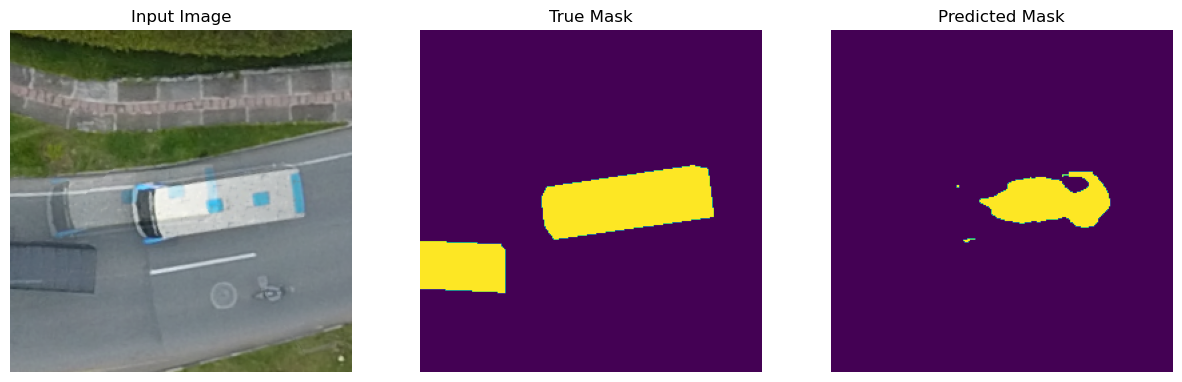

1/1 [==============================] - 0s 31ms/step


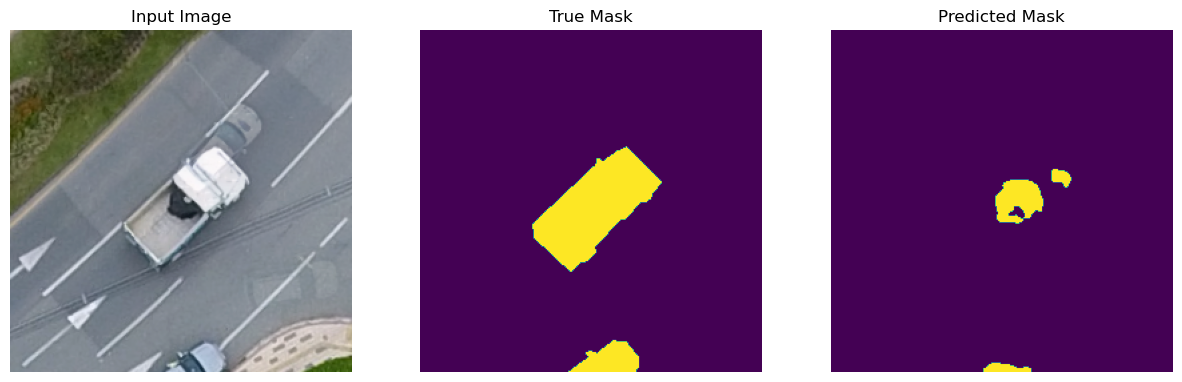

1/1 [==============================] - 0s 55ms/step


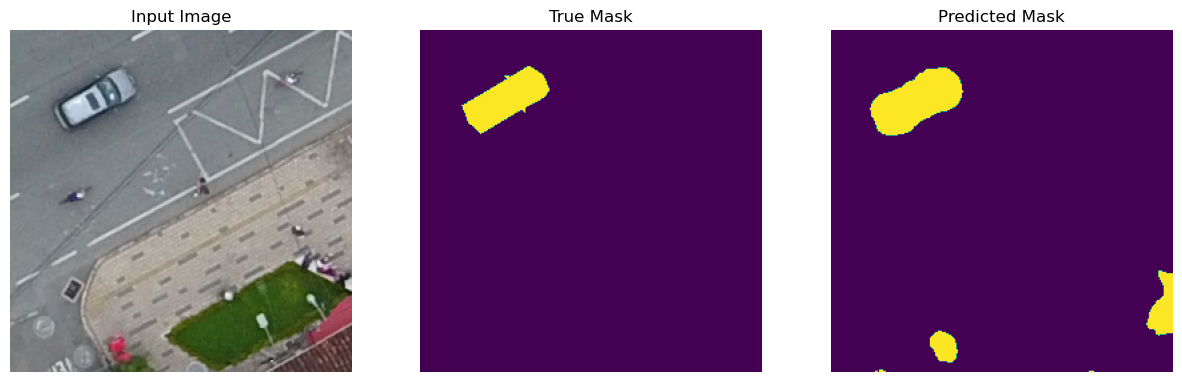

1/1 [==============================] - 0s 62ms/step


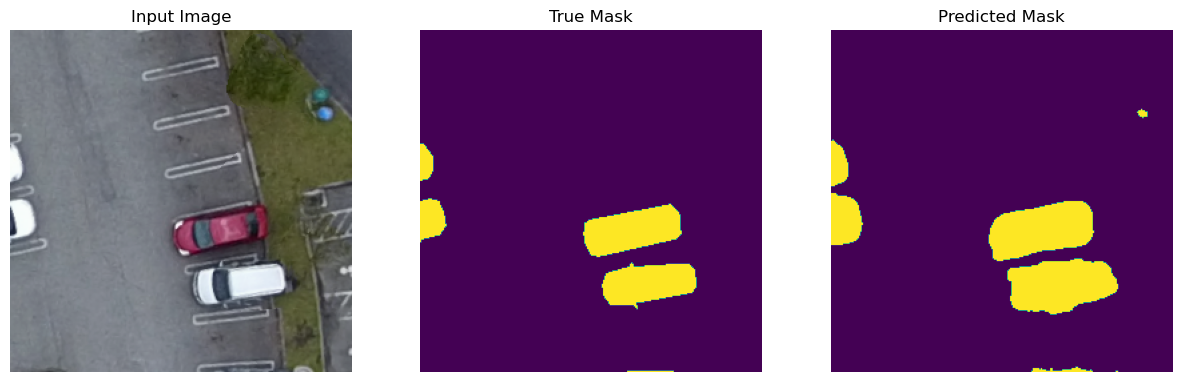

1/1 [==============================] - 0s 34ms/step


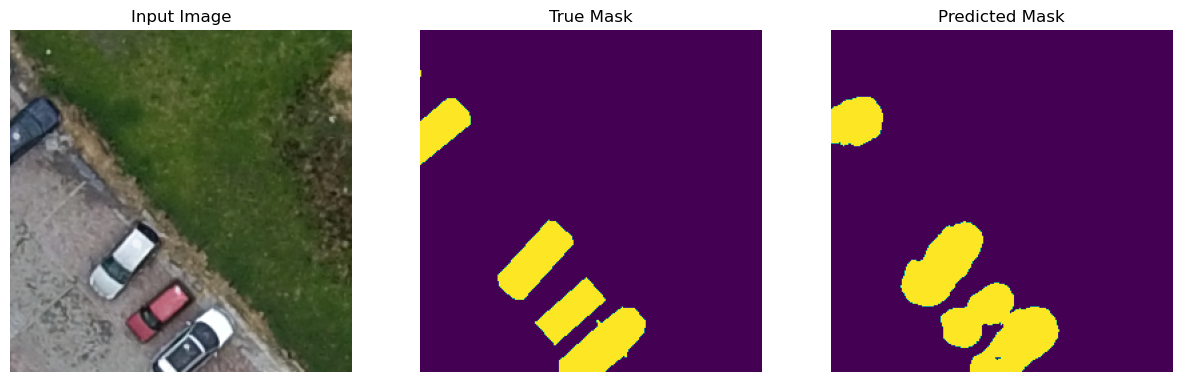

1/1 [==============================] - 0s 35ms/step


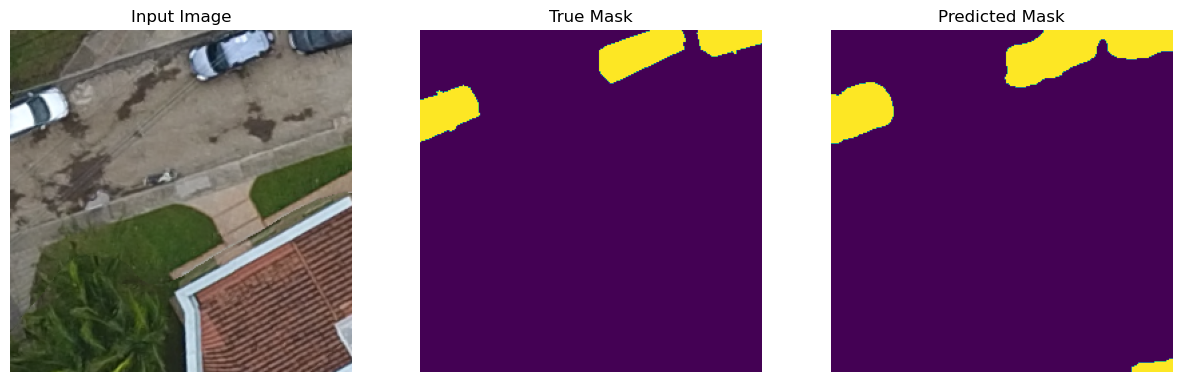

1/1 [==============================] - 0s 23ms/step


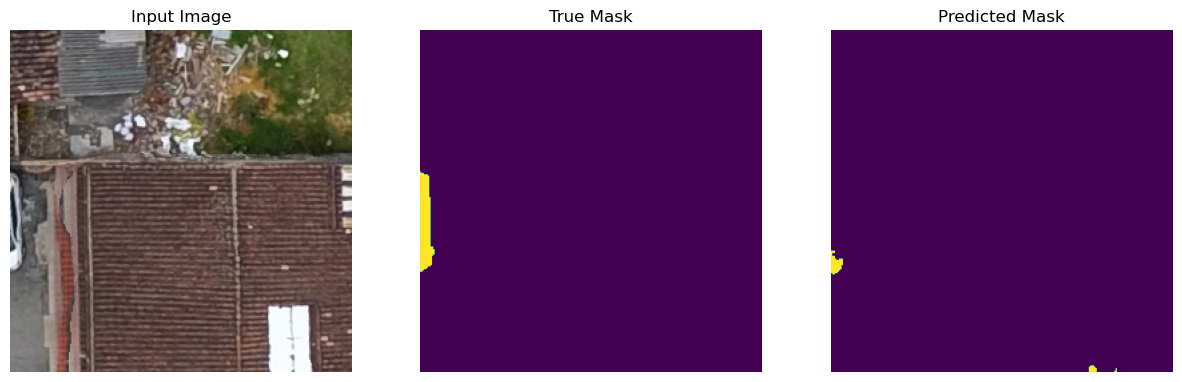

In [33]:
show_predictions(test_batches, unet_model, 16)